# OneClassSVM

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("../data_pretraitee/data_pretraite_svm.csv", sep=';', index_col = 0)
data = data.sort_values( by = 'N20')
data.head()

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,...,elev,pn,ref,week,month,year,2018,2019,2020,2021
60,-1.393499,2018-06-28,acs,0.115083,0.123920,9.704488,9.603074,0.619208,1.086268,62.0,...,0.0,0.0,0.0,26,6,2018,1.0,0.0,0.0,0.0
69,-0.436746,2018-07-11,elev,0.070751,0.099841,3.593315,5.343852,0.469527,0.300458,73.0,...,1.0,0.0,0.0,28,7,2018,1.0,0.0,0.0,0.0
330,-0.390366,2021-02-08,ref,0.222509,0.218402,6.047582,7.285328,1.889869,1.419856,86.0,...,0.0,0.0,1.0,6,2,2021,0.0,0.0,0.0,1.0
71,-0.323810,2018-07-11,ref,0.079820,0.101607,3.877878,6.230485,0.417917,0.236737,73.0,...,0.0,0.0,1.0,28,7,2018,1.0,0.0,0.0,0.0
233,-0.249388,2019-11-05,pn,0.208135,0.202400,1.366935,0.914537,3.321413,3.785169,87.0,...,0.0,1.0,0.0,45,11,2019,0.0,1.0,0.0,0.0


In [4]:
X = data.copy()
X = X.drop(X.columns[[1]], axis=1)
X = X.drop(X.columns[[1]], axis=1)
X.loc[X['N20'] <= 0.1, 'N20'] = 0.1
X['N20'] = np.log(X['N20']) # Passage au log de N2O pour diminuer influence des pics importants
print(range(X.shape[1]))
# print(X.columns[23])
# X.isna().sum()

range(0, 40)


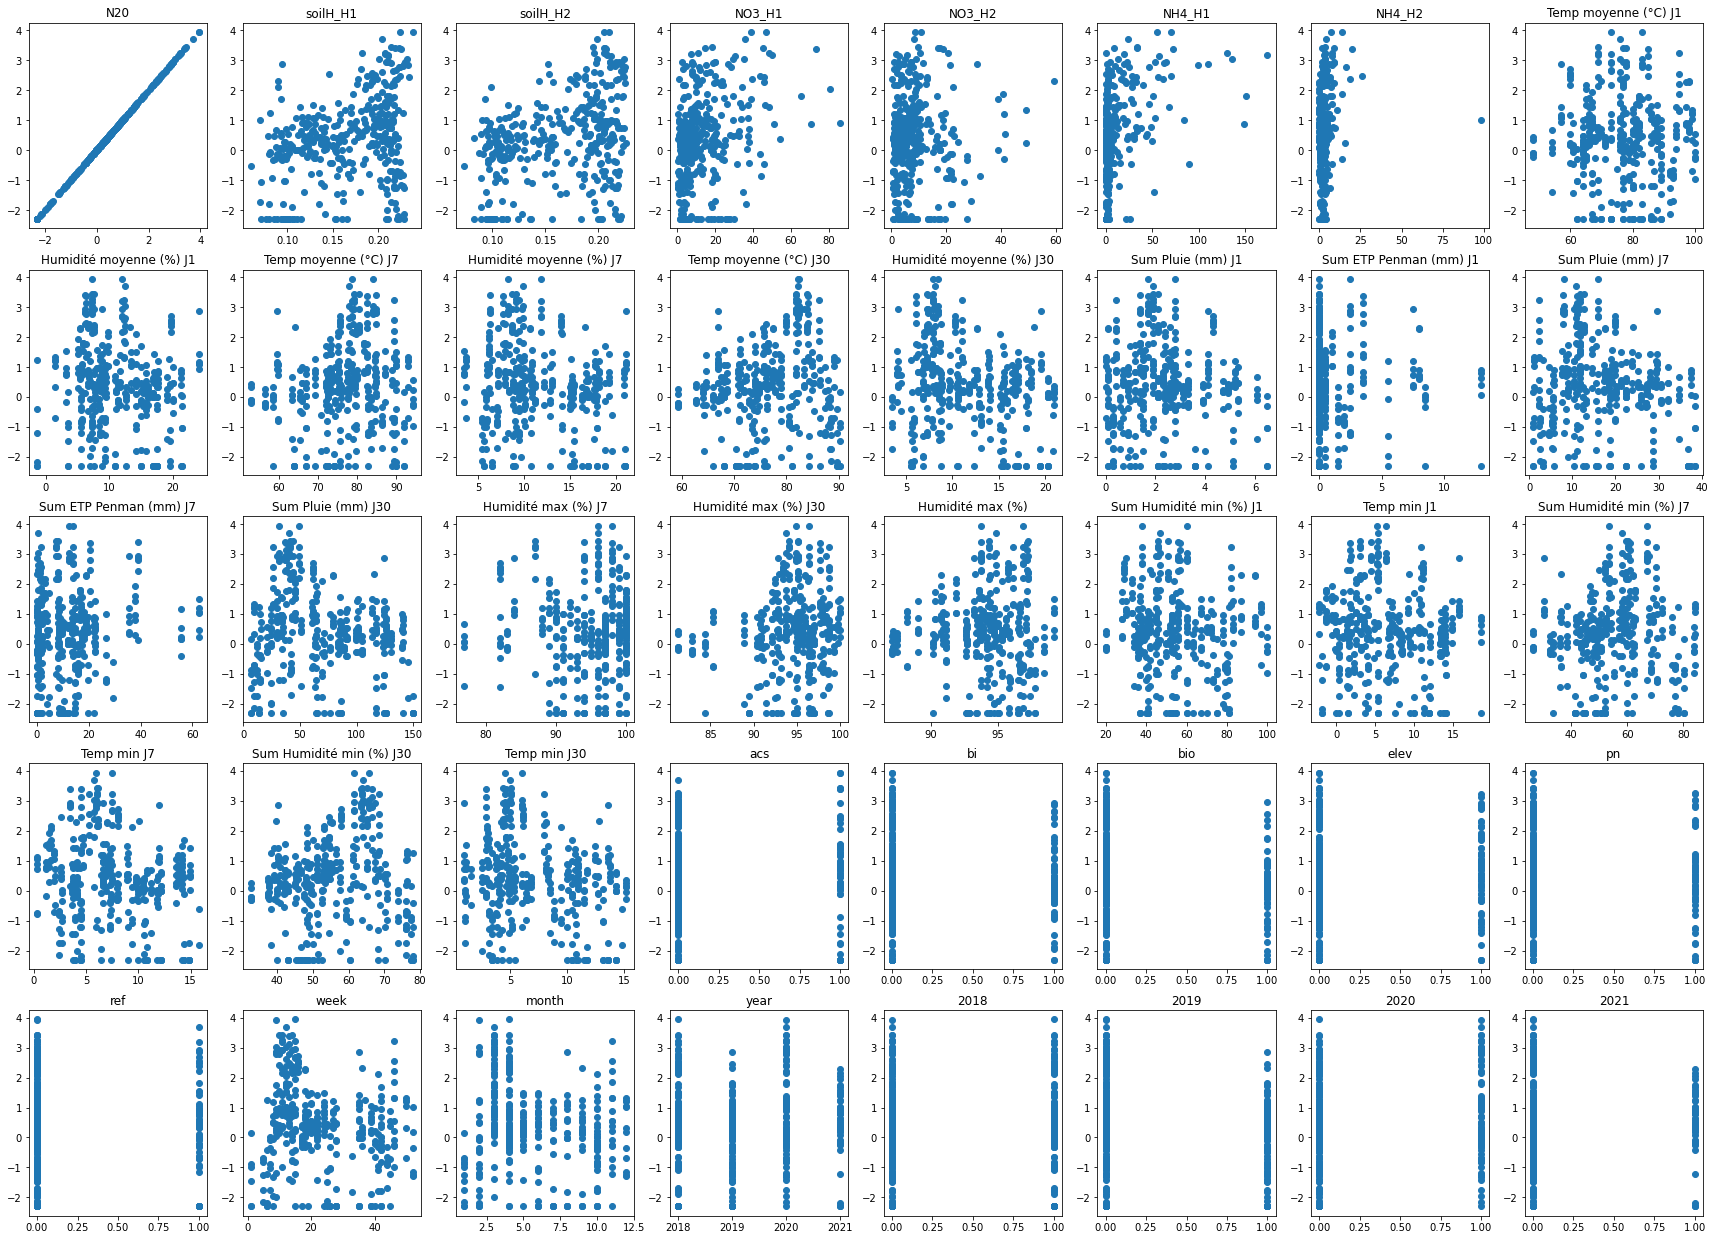

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30,10))

for i, name_c in enumerate(X.columns) :
    plt.subplot(6,8,i + 1)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(X[name_c], X[X.columns[:1]])
    plt.title(name_c)


In [7]:
X.iloc[:,36:40]

,2018,2019,2020,2021
60,1.0,0.0,0.0,0.0
69,1.0,0.0,0.0,0.0
330,0.0,0.0,0.0,1.0
71,1.0,0.0,0.0,0.0
233,0.0,1.0,0.0,0.0
...,...,...,...,...
18,1.0,0.0,0.0,0.0
265,0.0,0.0,1.0,0.0
276,0.0,0.0,1.0,0.0
253,0.0,0.0,1.0,0.0


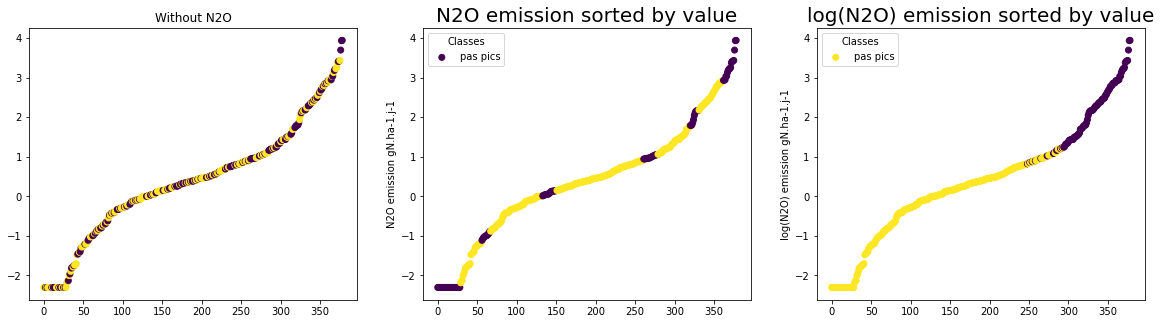

In [8]:
from sklearn.svm import OneClassSVM

train = X.copy()

y = train[train.columns[:1]]
train = train[train.columns[1:]]
# y_by_bandes = pd.concat(y, X.iloc[:, 27:33])
y_by_bandes = pd.concat([y, X.iloc[:, 27:33], X.iloc[:,36:40]], axis=1)

clf = OneClassSVM(gamma= 'auto', nu = 0.5, kernel= 'rbf') 
clf.fit(train)
Z = clf.predict(train)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
# plt.scatter(range(len(train[train.columns[:1]])),train[train.columns[:1]], c= Z)
plt.scatter(range(len(y)),y, c= Z)

plt.title("Without N2O")


clf_y = OneClassSVM(gamma= 'auto', nu = 0.2, kernel= 'rbf')
clf_y.fit(y)
Z_y = clf_y.predict(y)
plt.subplot(1,3,2)
scat = plt.scatter(range(len(y)),y, c= Z_y, label=['pas pics', 'pics'])
plt.ylabel("N2O emission gN.ha-1.j-1")
plt.title("N2O emission sorted by value", fontsize = 20)
plt.legend(['pas pics', 'pics'],loc="upper left", title="Classes")
# plt.line.set

clf_y_b = OneClassSVM(gamma= 'auto', nu = 0.5, kernel= 'rbf')
clf_y_b.fit(y_by_bandes)
Z_y_b = clf_y_b.predict(y_by_bandes)
Z_y_b[:int(len(Z_y_b)/3)] = [1] * int(len(Z_y_b)/3) # Je passe toutes valeurs pics détecter à la mauvaise extréminité à 1
plt.subplot(1,3,3)
plt.scatter(range(len(y)), y, c = Z_y_b, label=['pas pics', 'pics'])
plt.ylabel("log(N2O) emission gN.ha-1.j-1")
plt.title("log(N2O) emission sorted by value", fontsize = 20)
plt.legend(['pas pics', 'pics'],loc="upper left", title="Classes")

# mean_n20 = y.mean()
# Z_y_b.loc[X['N20'] < y.mean(), 'N20'] = 1
# print(Z_y) # Z_y + Date + Bande 


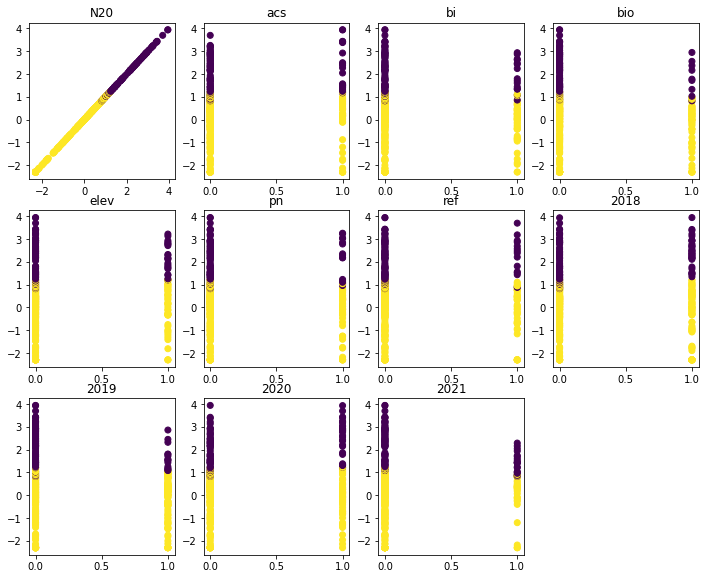

In [9]:
Z = clf.predict(train)
Z = Z.reshape(-1,1)

plt.figure(figsize=(12,5))
# plt.scatter(X[X.columns[:1]], X[X.columns[:1]], c= Z)
# for i, name_c in enumerate(train.columns) :
for i, name_c in enumerate(y_by_bandes) :
    plt.subplot(4,4,i + 1)
    # plt.scatter(train[name_c],train[train.columns[:1]], c= Z)
    plt.subplots_adjust(bottom=1, top=3) 
    plt.scatter(y_by_bandes[name_c],y, c= Z_y_b)
    plt.title(name_c)

    # plt.scatter(X1[:, i],X1[:, 0], c= Z)
    # plt.scatter(X_selected[:, i],y, c= Z)

In [10]:
data['Pic SVM'] = Z_y_b

In [11]:
data.head()

,N20,Date,Bande,soilH_H1,soilH_H2,NO3_H1,NO3_H2,NH4_H1,NH4_H2,Temp moyenne (°C) J1,...,pn,ref,week,month,year,2018,2019,2020,2021,Pic SVM
60,-1.393499,2018-06-28,acs,0.115083,0.123920,9.704488,9.603074,0.619208,1.086268,62.0,...,0.0,0.0,26,6,2018,1.0,0.0,0.0,0.0,1
69,-0.436746,2018-07-11,elev,0.070751,0.099841,3.593315,5.343852,0.469527,0.300458,73.0,...,0.0,0.0,28,7,2018,1.0,0.0,0.0,0.0,1
330,-0.390366,2021-02-08,ref,0.222509,0.218402,6.047582,7.285328,1.889869,1.419856,86.0,...,0.0,1.0,6,2,2021,0.0,0.0,0.0,1.0,1
71,-0.323810,2018-07-11,ref,0.079820,0.101607,3.877878,6.230485,0.417917,0.236737,73.0,...,0.0,1.0,28,7,2018,1.0,0.0,0.0,0.0,1
233,-0.249388,2019-11-05,pn,0.208135,0.202400,1.366935,0.914537,3.321413,3.785169,87.0,...,1.0,0.0,45,11,2019,0.0,1.0,0.0,0.0,1


In [14]:
data.to_csv("../data_pretraitee/data_svm_result.csv", sep=";")

In [20]:
test = pd.DataFrame(list(zip(data.Bande, data['Pic SVM'])), 
               columns =['Bande', 'Pic SVM']) 

test = test[test['Pic SVM'] == -1]
test = test.groupby('Bande').sum().abs()['Pic SVM']
test

Bande
acs     23
bi      15
bio      9
elev    21
pn      15
ref     15
Name: Pic SVM, dtype: int64

In [ ]:
# plt.bar(test.Bande, test.Pic, color='orange') 